In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import Dataset
from torchvision import datasets
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms
import numpy as np

In [2]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using mps device


## 使用自定义数据集

In [3]:
## 读取道具的 爬虫的数据映射
import json
with open("id_mapping_dict.json") as file:
    json_content = json.loads(file.read())
# json_content

In [4]:
classes = {v['new_id']:v["zh"]+":"+v["desc"] for i, v in json_content.items() if v.get("new_id")!= None}
classes

{0: '悲伤洋葱:射速上升。',
 1: '内眼:角色每次发射3颗泪弹。',
 2: '弯勺魔术:角色的泪弹获得追踪效果。',
 3: '柯吉猫的头:泪弹变大，击退效果上升，伤害上升。',
 4: '我的镜像:角色的泪弹会飞回角色身边。',
 5: '小号:射程下降，射速上升。',
 6: '殉道者之血:伤害上升。',
 7: '波比兄弟:发射普通泪弹的跟班。',
 8: '粪臭素:苍蝇不再攻击角色。',
 9: '苍蝇光环:两个阻挡敌人泪弹的苍蝇环绕物。',
 10: '1UP!:生命+1',
 11: '魔法蘑菇:心之容器+1，回满红心，移速上升，伤害上升，射程上升。角色体型变大。',
 12: '病毒:移速上升，碰到角色的敌人会中毒。',
 13: '过量类固醇:移速上升，射程上升。',
 14: '<3:心之容器+1，回满红心。',
 15: '生肝:心之容器+2，回满红心。',
 16: '骷髅钥匙:钥匙+99',
 17: '一美元:硬币+100',
 18: '轰！:炸弹+10',
 19: '超凡升天:角色获得飞行效果。',
 20: '指南针:显示特殊房间的位置。',
 21: '午餐:心之容器+1，回复一颗红心。',
 22: '正餐:心之容器+1，回复一颗红心。',
 23: '甜点:心之容器+1，回复一颗红心。',
 24: '早餐:心之容器+1，回复一颗红心。',
 25: '烂肉:心之容器+1，回复一颗红心。',
 26: '木头勺子:移速上升。',
 27: '皮带:移速上升。',
 28: '妈妈的内裤:射程上升。',
 29: '妈妈的高跟鞋:射程上升。',
 30: '妈妈的口红:射程上升。',
 31: '铁丝衣架:射速上升。',
 32: '圣经:使用后，获得飞行效果。',
 33: '彼列之书:使用后，在当前房间内伤害上升。',
 34: '死灵之书:使用后，对所有敌人造成伤害。',
 35: '大便:使用后，生成一个大便。',
 36: '炸弹先生:使用后，放置一个大炸弹。',
 37: '塔米猫的头:使用后，发射十颗泪弹。',
 38: '妈妈的胸罩:使用后，房间中的所有敌人石化。',
 39: '神风！:使用后，角色会爆炸，对附近的敌人造成伤害。',
 40: '妈妈的卫生巾:使用后，当前房间中的所有敌人恐惧。',


In [5]:
import os
images = os.listdir("cus_data/")
print(len(images))
images.sort(key=lambda x: int(x.split(".")[0]))

for i in range(719):
    name = int(images[i].split(".")[0])
    if i != name:
        print(name)


719


In [6]:
# 自定义数据集
from torchvision.io import read_image

class IssacCustomDatasets(Dataset):
    def __init__(self, annotations_file, 
                 img_dir, transform=None, 
                target_transform=None):
        self.img_labels = annotations_file  # 直接生成他们的顺序标签, 后面dataloader再shuffle
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
        
    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, str(self.img_labels[idx])+ ".png" )
        image = read_image(img_path, mode=torchvision.io.image.ImageReadMode.RGB)

        label = self.img_labels[idx]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

## 加载自定义数据集

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


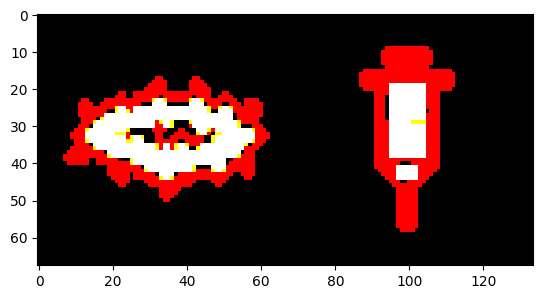

殉道者之血:伤害上升。 过量类固醇:移速上升，射程上升。


In [7]:
# dir_path = "cus_data/"
meta_output_dir = "mini_20meta_dataset"

transform = transforms.Compose(
    [
#         transforms.ToTensor(),
        transforms.Lambda(lambda x: x.float()),
#         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

    ])
        
batch_size = 2 
labels = list(range(20))
train_dataset = IssacCustomDatasets(labels, img_dir="mini_20meta_dataset/",
                                    transform=transform)
        
## dataloader
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(train_dataloader)
images, labels = next(dataiter)

# show imagesd
imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j].item()]:10s}' for j in range(batch_size)))

## 自定义自定义的简单CNN模型结构